# Maze solving

The agent will try to learn its way in a maze

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import time
from env import *

C:\Users\HP\anaconda3\lib\site-packages\ale_py\roms\__init__.py:84: DeprecationWarning: Automatic importing of atari-py roms won't be supported in future releases of ale-py. Please migrate over to using `ale-import-roms` OR an ALE-supported ROM package. To make this warning disappear you can run `ale-import-roms --import-from-pkg atari_py.atari_roms`.For more information see: https://github.com/mgbellemare/Arcade-Learning-Environment#rom-management
  __all__ = _resolve_roms()


# Generate a maze

In [23]:
import time
from env import *
#create the maze
SIZE = 20

layout, start, target = create_maze(SIZE)
print(start, target)
#show_layout(layout)
print(layout.shape)

[1 1] [18 18]
(20, 20)


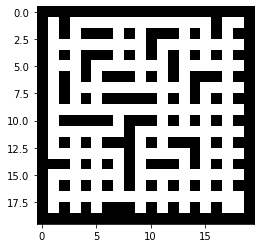

In [24]:
env = Maze(layout, start, target, size=SIZE)
plt.imshow(1-layout, cmap='gray')

# Q-learning

In [25]:
from algos.QLearning import run_q

#initiate the environment
env = Maze(layout, start, target, size=SIZE)

EPSILON = 0.01
ALPHA = 0.5
GAMMA = 1.0

nb_eps = 100
plt.figure()

        

plt.figure(figsize=(10, 5))
q, nb_steps_to_finish, all_state_visits = run_q(env, nb_eps, EPSILON, ALPHA, GAMMA)
cv2.destroyAllWindows()

Episode 1  | Nb Steps to finish: 1123
Episode 2  | Nb Steps to finish: 464
Episode 3  | Nb Steps to finish: 599
Episode 4  | Nb Steps to finish: 866
Episode 5  | Nb Steps to finish: 138
Episode 6  | Nb Steps to finish: 380
Episode 7  | Nb Steps to finish: 180
Episode 8  | Nb Steps to finish: 321
Episode 9  | Nb Steps to finish: 148
Episode 10  | Nb Steps to finish: 329
Episode 11  | Nb Steps to finish: 155
Episode 12  | Nb Steps to finish: 194
Episode 13  | Nb Steps to finish: 104
Episode 14  | Nb Steps to finish: 291
Episode 15  | Nb Steps to finish: 138
Episode 16  | Nb Steps to finish: 112
Episode 17  | Nb Steps to finish: 358
Episode 18  | Nb Steps to finish: 151
Episode 19  | Nb Steps to finish: 88
Episode 20  | Nb Steps to finish: 96
Episode 21  | Nb Steps to finish: 184
Episode 22  | Nb Steps to finish: 173
Episode 23  | Nb Steps to finish: 121
Episode 24  | Nb Steps to finish: 111
Episode 25  | Nb Steps to finish: 156
Episode 26  | Nb Steps to finish: 110
Episode 27  | Nb Steps

<Figure size 432x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

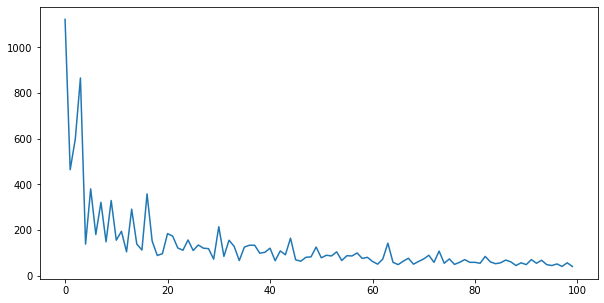

In [26]:
#nb_steps to finish episode
plt.figure(figsize = (10, 5))
plt.plot(nb_steps_to_finish)
plt.show()

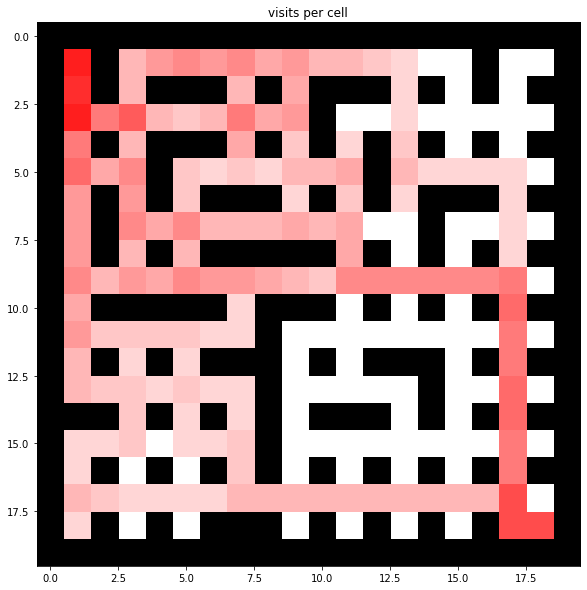

In [27]:
#visits per state
cmap = plt.get_cmap('PuBu')

def int_to_tuple(SIZE, int_):
    x = int(int_ / SIZE)
    y = int_ - x*SIZE
    return (x, y)

mean = np.array(all_state_visits).mean(axis=0)

img =  np.zeros((SIZE, SIZE, 3))
for channel in range(img.shape[2]):
    img[:, :, channel] = layout 

#invert colors
img = (1 - img) * 255.
grid_visits = np.zeros((SIZE, SIZE))

#for each state, fill the grid/img with the mean nb of visits
for state in range(len(mean)):
    (x, y) = int_to_tuple(SIZE, state)
    
    #for the img, we only want to modify the color of visited cells
    if mean[state] != 0:
        color = (mean[state]/max(mean))*200
        img[x, y, :] = [255, 230- color, 230- color]
    #grid_visits[SIZE - 1 - x, y] = mean[state] # we have to revert the rows as for an image the rows are 0 at the very top and here it's SIZE
    
plt.figure(figsize = (10, 10))
plt.title("visits per cell")
plt.imshow(img/255, vmin=0, vmax=1)
plt.show()

## Hyperparameter tuning

0.01
0.1
0.5
1


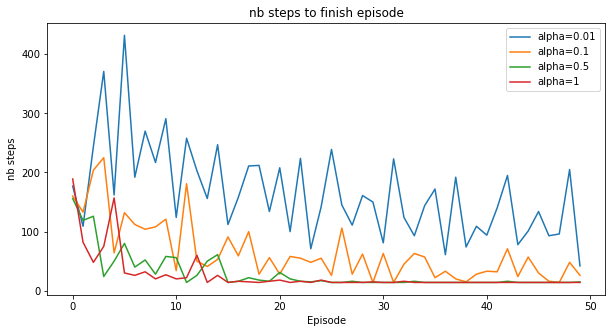

In [11]:
#intialiaze env
SIZE_h = 10
layout_h, start_h, target_h = create_maze(SIZE_h)
env = Maze(layout_h, start_h, target_h, size=SIZE_h)

alphas = [0.01, 0.1, 0.5, 1]
EPSILON = 0.01
GAMMA = 1.0
nb_eps = 50

#run experiments
plt.figure(figsize=(10, 5))
for alpha in alphas:
    print(alpha)
    q, nb_steps_to_finish, all_state_visits = run_q(env, nb_eps, EPSILON, alpha, GAMMA, verbose=False)
    cv2.destroyAllWindows()
    plt.plot(nb_steps_to_finish, label="alpha="+str(alpha))
plt.title("nb steps to finish episode")
plt.xlabel("Episode")
plt.ylabel("nb steps")
plt.legend()

# Double Q-learning

In [28]:
from algos.QLearning import run_double_q

SIZE= 20
#initiate the environment
env = Maze(layout, start, target, size=SIZE)

EPSILON = 0.01
ALPHA = 0.5
GAMMA = 1.0

nb_eps = 100
plt.figure()

        

plt.figure(figsize=(10, 5))
q1, q2, nb_steps_to_finish, all_state_visits = run_double_q(env, nb_eps, EPSILON, ALPHA, GAMMA)
cv2.destroyAllWindows()

Episode 1  | Nb Steps to finish: 1499
Episode 2  | Nb Steps to finish: 710
Episode 3  | Nb Steps to finish: 663
Episode 4  | Nb Steps to finish: 487
Episode 5  | Nb Steps to finish: 391
Episode 6  | Nb Steps to finish: 948
Episode 7  | Nb Steps to finish: 377
Episode 8  | Nb Steps to finish: 746
Episode 9  | Nb Steps to finish: 679
Episode 10  | Nb Steps to finish: 195
Episode 11  | Nb Steps to finish: 307
Episode 12  | Nb Steps to finish: 278
Episode 13  | Nb Steps to finish: 616
Episode 14  | Nb Steps to finish: 309
Episode 15  | Nb Steps to finish: 565
Episode 16  | Nb Steps to finish: 161
Episode 17  | Nb Steps to finish: 410
Episode 18  | Nb Steps to finish: 602
Episode 19  | Nb Steps to finish: 226
Episode 20  | Nb Steps to finish: 284
Episode 21  | Nb Steps to finish: 216
Episode 22  | Nb Steps to finish: 400
Episode 23  | Nb Steps to finish: 277
Episode 24  | Nb Steps to finish: 410
Episode 25  | Nb Steps to finish: 237
Episode 26  | Nb Steps to finish: 133
Episode 27  | Nb Ste

<Figure size 432x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

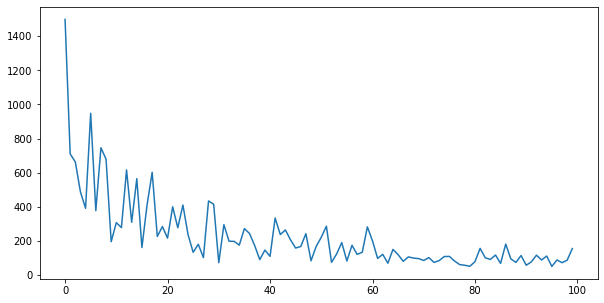

In [29]:
#nb_steps to finish episode
plt.figure(figsize = (10, 5))
plt.plot(nb_steps_to_finish)
plt.show()

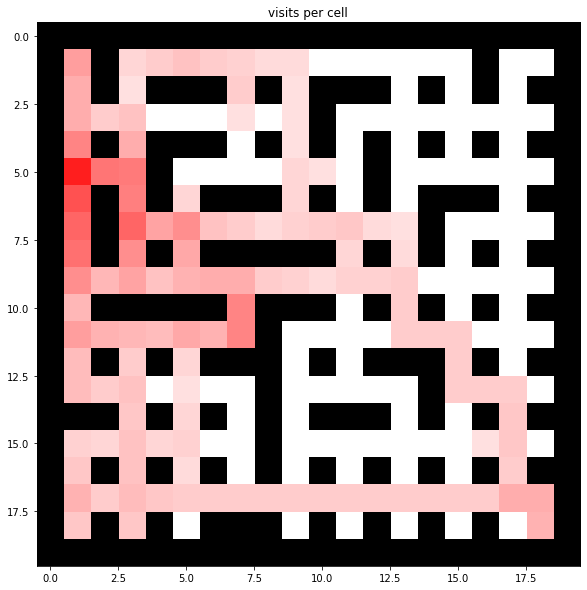

In [30]:
#visits per state
cmap = plt.get_cmap('PuBu')

def int_to_tuple(SIZE, int_):
    x = int(int_ / SIZE)
    y = int_ - x*SIZE
    return (x, y)

mean = np.array(all_state_visits).mean(axis=0)

img =  np.zeros((SIZE, SIZE, 3))
for channel in range(img.shape[2]):
    img[:, :, channel] = layout 

#invert colors
img = (1 - img) * 255.
grid_visits = np.zeros((SIZE, SIZE))

#for each state, fill the grid/img with the mean nb of visits
for state in range(len(mean)):
    (x, y) = int_to_tuple(SIZE, state)
    
    #for the img, we only want to modify the color of visited cells
    if mean[state] != 0:
        color = (mean[state]/max(mean))*200
        img[x, y, :] = [255, 230- color, 230- color]
    #grid_visits[SIZE - 1 - x, y] = mean[state] # we have to revert the rows as for an image the rows are 0 at the very top and here it's SIZE
    
plt.figure(figsize = (10, 10))
plt.title("visits per cell")
plt.imshow(img/255, vmin=0, vmax=1)
plt.show()

# Expected SARSA

In [31]:
from algos.SARSA import run_ES

EPSILON = 0.01
ALPHA = 0.5
GAMMA = 1.0

nb_eps = 100
plt.figure()


        

plt.figure(figsize=(10, 5))
q, nb_steps_to_finish, all_state_visits = run_ES(env, nb_eps, EPSILON, ALPHA, GAMMA)
cv2.destroyAllWindows()

Episode 1  | Nb Steps to finish: 621
Episode 2  | Nb Steps to finish: 1479
Episode 3  | Nb Steps to finish: 300
Episode 4  | Nb Steps to finish: 410
Episode 5  | Nb Steps to finish: 200
Episode 6  | Nb Steps to finish: 127
Episode 7  | Nb Steps to finish: 226
Episode 8  | Nb Steps to finish: 246
Episode 9  | Nb Steps to finish: 150
Episode 10  | Nb Steps to finish: 215
Episode 11  | Nb Steps to finish: 300
Episode 12  | Nb Steps to finish: 235
Episode 13  | Nb Steps to finish: 134
Episode 14  | Nb Steps to finish: 210
Episode 15  | Nb Steps to finish: 204
Episode 16  | Nb Steps to finish: 190
Episode 17  | Nb Steps to finish: 114
Episode 18  | Nb Steps to finish: 216
Episode 19  | Nb Steps to finish: 111
Episode 20  | Nb Steps to finish: 143
Episode 21  | Nb Steps to finish: 230
Episode 22  | Nb Steps to finish: 136
Episode 23  | Nb Steps to finish: 130
Episode 24  | Nb Steps to finish: 156
Episode 25  | Nb Steps to finish: 97
Episode 26  | Nb Steps to finish: 103
Episode 27  | Nb Step

<Figure size 432x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

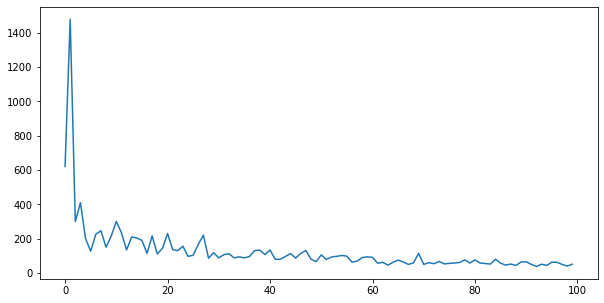

In [32]:
#nb_steps to finish episode
plt.figure(figsize = (10, 5))
plt.plot(nb_steps_to_finish)
plt.show()

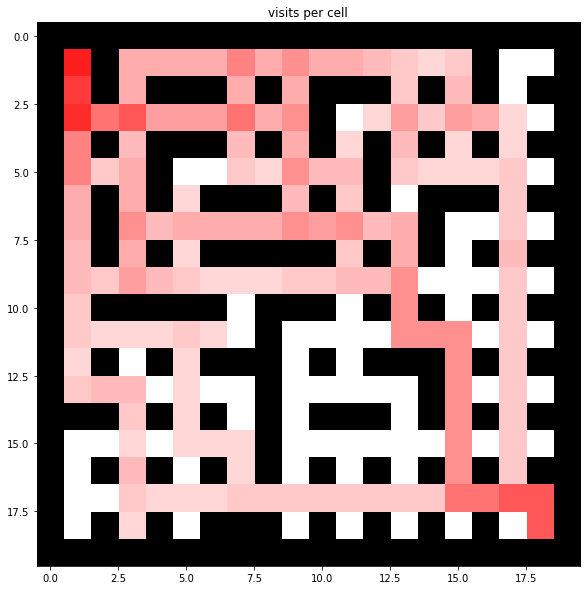

In [33]:
#visits per state
cmap = plt.get_cmap('PuBu')

def int_to_tuple(SIZE, int_):
    x = int(int_ / SIZE)
    y = int_ - x*SIZE
    return (x, y)

mean = np.array(all_state_visits).mean(axis=0)

img =  np.zeros((SIZE, SIZE, 3))
for channel in range(img.shape[2]):
    img[:, :, channel] = layout 

#invert colors
img = (1 - img) * 255.
grid_visits = np.zeros((SIZE, SIZE))

#for each state, fill the grid/img with the mean nb of visits
for state in range(len(mean)):
    (x, y) = int_to_tuple(SIZE, state)
    
    #for the img, we only want to modify the color of visited cells
    if mean[state] != 0:
        color = (mean[state]/max(mean))*200
        img[x, y, :] = [255, 230- color, 230- color]
    #grid_visits[SIZE - 1 - x, y] = mean[state] # we have to revert the rows as for an image the rows are 0 at the very top and here it's SIZE
    
plt.figure(figsize = (10, 10))
plt.title("visits per cell")
plt.imshow(img/255, vmin=0, vmax=1)
plt.show()

# DDQN

In [34]:
from algos.DDQN import *

#initiate the environment
env = Maze(layout, start, target, size=SIZE)

agent = DQNAgent(env)

max_episodes = 100
max_steps = 1500
batch_size = 32
nb_steps_to_finish, all_state_visits = run_DDQN(env, agent, max_episodes, max_steps, batch_size, verbose = True)
cv2.destroyAllWindows()

DQN(
  (fc): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)
DQN(
  (fc): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)
Episode 1  | Nb Steps to finish: 216
Episode 2  | Nb Steps to finish: 1500
Episode 3  | Nb Steps to finish: 1500
Episode 4  | Nb Steps to finish: 1500
Episode 5  | Nb Steps to finish: 1500
Episode 6  | Nb Steps to finish: 1500
Episode 7  | Nb Steps to finish: 769
Episode 8  | Nb Steps to finish: 1500
Episode 9  | Nb Steps to finish: 1500
Episode 10  | Nb Steps to finish: 1500
Episode 11  | Nb Steps to finish: 747
Episode 12  | Nb Steps to finish: 1500
Episode 13  | Nb Steps to finish: 1500
Episode 14  | Nb Steps 

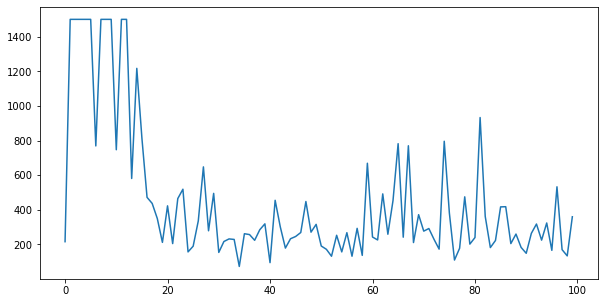

In [35]:
#nb_steps to finish episode
plt.figure(figsize = (10, 5))
plt.plot(nb_steps_to_finish)
plt.show()

# A2C

## NStep A2C

In [38]:
#initiate the environment
env = Maze(layout, start, target, size=SIZE)

plt.figure()

from algos.NStep_A2C import *
lr = 1e-3
gamma = 1 #no discount
agent = N_Step_A2CAgent(env, learning_rate=lr, gamma=gamma)

max_steps = 1500
nb_eps = 50

        

plt.figure(figsize=(10, 5))
agent, nb_steps_to_finish, all_state_visits = run_nstep_a2c(env, agent, nb_eps, max_steps, verbose = True)
cv2.destroyAllWindows()

Actor(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
    (5): Softmax(dim=0)
  )
)
Critic(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)
Episode 1  | Nb Steps to finish: 1500
Episode 2  | Nb Steps to finish: 1500
Episode 3  | Nb Steps to finish: 1500
Episode 4  | Nb Steps to finish: 1500
Episode 5  | Nb Steps to finish: 1500
Episode 6  | Nb Steps to finish: 450
Episode 7  | Nb Steps to finish: 1500
Episode 8  | Nb Steps to finish: 1500
Episode 9  | Nb Steps to finish: 1125
Episode 10  | Nb Steps to finish: 637
Episode 11  | Nb Steps to finish: 1500
Episode 12  | Nb Steps to finish: 1500
Episode 13  | Nb Steps

<Figure size 432x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [39]:
cv2.destroyAllWindows()

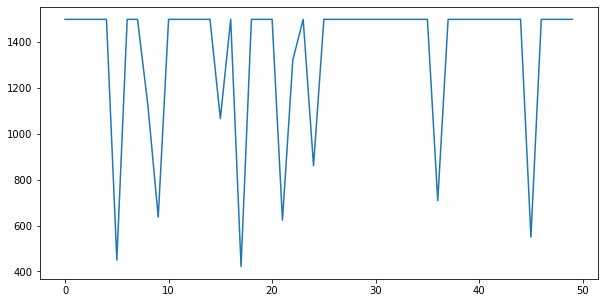

In [40]:
#nb_steps to finish episode
plt.figure(figsize = (10, 5))
plt.plot(nb_steps_to_finish)
plt.show()

## 1Step A2C

In [41]:
from algos.OneStep_A2C import *
agent = OneStep_A2CAgent(env, learning_rate = 1e-5)
plt.figure()

max_steps = 1500
nb_eps = 50

        

plt.figure(figsize=(10, 5))
agent, nb_steps_to_finish, all_state_visits = run_a2c(env, agent, nb_eps, max_steps, verbose = True)
cv2.destroyAllWindows()

Actor(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=4, bias=True)
    (5): Softmax(dim=0)
  )
)
Critic(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)
Episode 1  | Nb Steps to finish: 583
Episode 2  | Nb Steps to finish: 1382
Episode 3  | Nb Steps to finish: 790
Episode 4  | Nb Steps to finish: 740
Episode 5  | Nb Steps to finish: 486
Episode 6  | Nb Steps to finish: 442
Episode 7  | Nb Steps to finish: 1354
Episode 8  | Nb Steps to finish: 1047
Episode 9  | Nb Steps to finish: 632
Episode 10  | Nb Steps to finish: 172
Episode 11  | Nb Steps to finish: 1500
Episode 12  | Nb Steps to finish: 889
Episode 13  | Nb Steps to finish

<Figure size 432x288 with 0 Axes>

<Figure size 720x360 with 0 Axes>

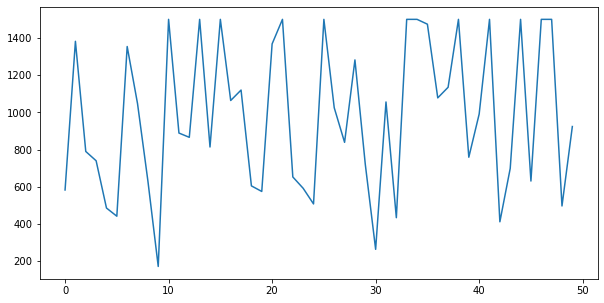

In [42]:
#nb_steps to finish episode
plt.figure(figsize = (10, 5))
plt.plot(nb_steps_to_finish)
plt.show()

In [43]:
cv2.destroyAllWindows()

# Comparison between algos

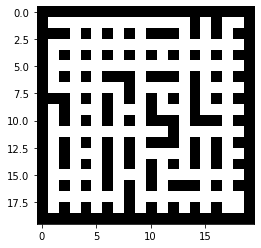

In [44]:
from env import *
import time
#create the maze
SIZE = 20

layout, start, target = create_maze(SIZE)
env = Maze(layout, start, target, size=SIZE)
plt.imshow(1-layout, cmap='gray')

q_learning running...
double_q running...
ES running...
DDQN running...
DQN(
  (fc): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)
DQN(
  (fc): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
  )
)
NStep_A2C running...
Actor(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=4, bias=True)
    (5): Softmax(dim=0)
  )
)
Critic(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=

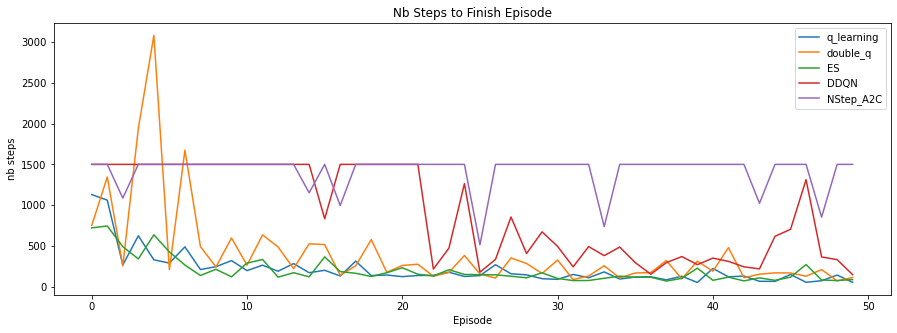

In [50]:
algos = ["q_learning", "double_q", "ES", "DDQN", "NStep_A2C", "1Step_A2C"]

EPSILON = 0.01
ALPHA = 0.5
GAMMA = 1.0

max_steps = 1500
batch_size = 32
nb_eps = 50

plt.figure(figsize=(15, 5))
for algo in algos:
    print(algo + " running...")
    
    if algo == "q_learning":
        q, nb_steps_to_finish, all_state_visits = run_q(env, nb_eps, EPSILON, ALPHA, GAMMA, verbose=False)
        
    if algo == "double_q":
        q1, q2, nb_steps_to_finish, all_state_visits = run_double_q(env, nb_eps, EPSILON, ALPHA, GAMMA, verbose=False)
        
    if algo == "ES":
        q, nb_steps_to_finish, all_state_visits = run_ES(env, nb_eps, EPSILON, ALPHA, GAMMA, verbose=False)
        
    if algo == "DDQN":
        agent = DQNAgent(env)
        nb_steps_to_finish, all_state_visits = run_DDQN(env, agent, nb_eps, max_steps, batch_size, verbose = False)
        
    if algo == "NStep_A2C":
        agent = N_Step_A2CAgent(env, learning_rate=1e-3, gamma=1)
        agent, nb_steps_to_finish, all_state_visits = run_nstep_a2c(env, agent, nb_eps, max_steps, verbose = False)
        
    if algo == "1Step_A2C":
        agent = OneStep_A2CAgent(env, learning_rate = 1e-5)
        agent, nb_steps_to_finish, all_state_visits = run_a2c(env, agent, nb_eps, max_steps, verbose = False)
    
    #print("Time to finish algo : {:.2f}".format())
    plt.plot(nb_steps_to_finish, label=algo)
    
    
cv2.destroyAllWindows()


plt.title("Nb Steps to Finish Episode")
plt.xlabel("Episode")
plt.ylabel("nb steps")
plt.legend()